<a href="https://colab.research.google.com/github/ebuillent13yadav/Pandas_Notes/blob/main/w3s_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas Basics

## Pandas Introduction

- Pandas is a Python library used for working with data sets.

- It has functions for analyzing, cleaning, exploring, and manipulating data.

- The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.

## Getting Started

In [ ]:
# Creating Dataframe
mydataset = {
    'cars': ["BMW", "Volvo", "Ford"],
    'passing': [3, 7, 2]
}

myvar = pd.DataFrame(mydataset)
myvar

,cars,passing
0,BMW,3
1,Volvo,7
2,Ford,2


In [ ]:
# Checking Pandas Version
print(pd.__version__)

2.2.2


## Pandas Series

In [ ]:
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)

0    1
1    7
2    2
dtype: int64


### Labels

In [ ]:
# Default labels
myvar[0]

np.int64(1)

In [ ]:
# Create Labels
a = [1, 7, 2]
myvar = pd.Series(a, index=["x", "y", "z"])
myvar

,0
x,1
y,7
z,2


In [ ]:
myvar["y"]

np.int64(7)

In [ ]:
# Key/Value Objects as Series
calories = {4: 420, "day2": 280, "day3": 390}
myvar = pd.Series(calories)
myvar

,0
4,420
day2,280
day3,390


In [ ]:
calories[4]

420

To select only some of the items in the dictionary, use the `index` argument and specify only the items you want to include in the Series.

In [ ]:
myvar = pd.Series(calories, index=[4, "day2"])
myvar

,0
4,420
day2,280


## Pandas DataFrames

In [ ]:
data = {
    "calories": [420, 380, 390],
    "duration": [50, 40, 45]
}
df = pd.DataFrame(data)
df

,calories,duration
0,420,50
1,380,40
2,390,45


### Locate Row

In [ ]:
# 1st row
df.loc[0]

,0
calories,420
duration,50


In [ ]:
#Retuen row 1 and 2
df.loc[[0,1]]

,calories,duration
0,420,50
1,380,40


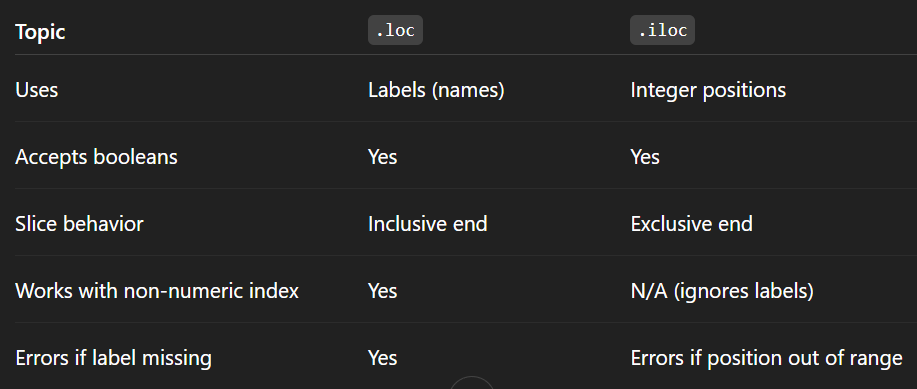

### Named Indexes

In [ ]:
df = pd.DataFrame(data, index=["day1", "day2", "day3"])
df

,calories,duration
day1,420,50
day2,380,40
day3,390,45


In [ ]:
# Locate named indexes
df.loc["day2"]

,day2
calories,380
duration,40


## Pandas Read CSV

In [ ]:
df = pd.read_csv('data.csv')
df.to_string()

'     Duration  Pulse  Maxpulse  Calories\n0          60    110       130     409.1\n1          60    117       145     479.0\n2          60    103       135     340.0\n3          45    109       175     282.4\n4          45    117       148     406.0\n5          60    102       127     300.0\n6          60    110       136     374.0\n7          45    104       134     253.3\n8          30    109       133     195.1\n9          60     98       124     269.0\n10         60    103       147     329.3\n11         60    100       120     250.7\n12         60    106       128     345.3\n13         60    104       132     379.3\n14         60     98       123     275.0\n15         60     98       120     215.2\n16         60    100       120     300.0\n17         45     90       112       NaN\n18         60    103       123     323.0\n19         45     97       125     243.0\n20         60    108       131     364.2\n21         45    100       119     282.0\n22         60    130       101   

In [ ]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


## Pandas Analyzing Data

### Viewing the Data

In [ ]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [ ]:
df.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


### Info About the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


# Cleaning Data

Data Cleaning means fixing bad data in the dataset.<br>
Bad data could be:
- Empty cells
- Data in wrong format
- Wrong data
- Duplicates

In [2]:
# Our Dataset
df = pd.read_csv("data2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


## Cleaning Empty Cells

### Remove Rows

One way to deal with empty cells is to remove rows that contain empty cells.<br>
This is usually OK, since data sets can be very big, and removing a few rows will not have a big impact on the result.

In [3]:
new_df = df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  29 non-null     int64  
 1   Date      29 non-null     object 
 2   Pulse     29 non-null     int64  
 3   Maxpulse  29 non-null     int64  
 4   Calories  29 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


### Replace Empty Values

Another way of dealing with empty cells is to insert a new value instead.<br>
This way you do not have to delete entire rows just because of some empty cells.

In [4]:
new_df = df.fillna(130)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [5]:
# The example above replaces all empty cells in the whole Data Frame.
# To only replace empty values for one column, specify the column name for the DataFrame
new_df = df.fillna({"Calories": 130})
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


**Replace Using Mean, Median, or Mode**<br>
A common way to replace empty cells, is to calculate the mean, median or mode value of the column.<br>
Pandas uses the `mean()` `median()` and `mode()` methods to calculate the respective values for a specified column:

In [6]:
# Calculate the MEAN, and replace any empty values with it.
x = df["Calories"].mean()
new_df = df.fillna({"Calories": x})
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [7]:
# Calculate the MEDIAN, and replace any empty values with it:
x = df["Calories"].median()
new_df = df.fillna({"Calories": x})
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [8]:
# Calculate the MODE, and replace any empty values with it:
x = df["Calories"].mode()
new_df = df.fillna({"Calories": x})
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


## Cleaning Wrong Format

**Data of Wrong Format**<br>
Cells with data of wrong format can make it difficult, or even impossible, to analyze into the same format.<br>
To fix it, you have two options: remove the rows, or convert all cells in the columns into the same format.

### Convert Into a Correct Format

In [9]:
df["Date"] = pd.to_datetime(df['Date'], format='mixed')
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


As we can see from the result, the date in row 26 was fixed, but the empty date in row 22 got a NaT (Not a Time) value, in other words an empty value. One way to deal with empty values is simply removing the entire row.

### Removing Rows

In [10]:
# Remove rows with a NULL value in the "Date" column:
df.dropna(subset=["Date"], inplace=True)

In [11]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


## Cleaning Wrong Data

**Wrong Data**<br><br>
- "Wrong data" does not have to be 'empty cells' or 'wrong format', it can just be wrong, like if someone registered "199" instead of "1.99".
- Sometimes we can spot wrong data by looking at the data set, because we have an expectation of what it should be.
- If you take a look a our data set, you can see that in row 7, the duration in 450, but for all the other rows the duration is between 30 and 60.
- It doesn't have to be wrong, but taking in consideration that this is the data set of someone's workout sessions, we conclude with the fact that this person did not work out in 450 minutes.

### Replacing Values

One way to fix wrong values is to replace them with something else.

In our example, it is most likely a typo, and the value should be "45" instead of "450", and we could just insert "45" in row 7:

In [12]:
df.loc[7, 'Duration'] = 450

In [13]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


For small data sets you might be able to replace the wrong data one by one, but not for big data sets.

To replace wrong data for larger data sets you can create some rules, e.g. set some boundaries for legal values, and replace any values that are outside of the boundaries.

In [14]:
# If value is higher than 120, set it to 120.
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.loc[x, 'Duration'] = 120

In [15]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,120,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


### Removing Rows

In [16]:
# Delete rows where "Duration" is higher than 120:
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.drop(x, inplace = True)
# drop() deletes ann entire row a that index

In [17]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,120,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


## Removing Duplicates

We see that row 11 and 12 are duplicate.<br>
duplicated() -> returns a Boolean values for each row:<br>
Returns true for every row that is a duplicate, otherwise False:

In [18]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [19]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [20]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,120,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


# Correlations

**Finding Relationships**
- A great aspect of the Pandas module is the corr() method.
- The `corr()` method calculates the relationship between each column in our data set.

In [21]:
df = pd.read_csv('./data.csv')

In [22]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


The `corr()` method ignores "not numeric columns.

# Pandas Plotting

Pandas uses the `plot()` method to crete diagrams.<br>
We can use Pyplot, a submodule of the Matplotlib library to visualize the diagram on the screen.

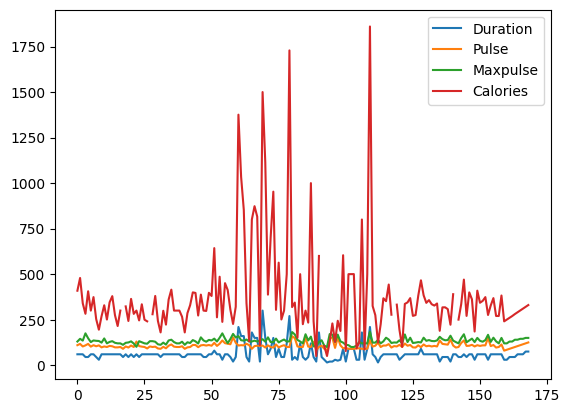

In [25]:
df.plot()
plt.show()

### Scatter Plot

Specify that you want a scatter plot with the `kind` argument:<br>
A Scatter plot needs an x- and y- axis.<br>
In the example below we will use "Duration" for the x-axis and "Calories" for the y-axis.<br>

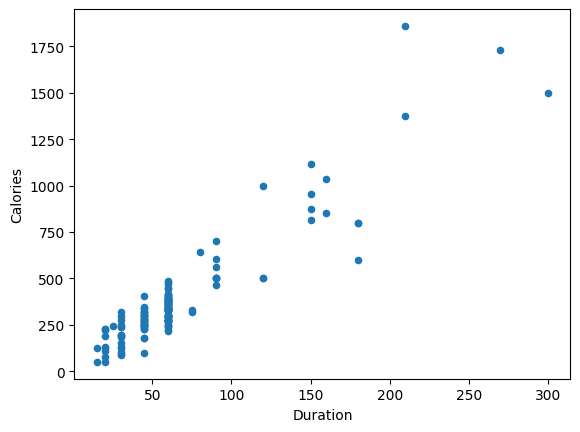

In [27]:
df.plot(kind='scatter', x="Duration", y="Calories")
plt.show()

In the previous example, we learned that the correlation between "Duration" and "Calories" was 0.922721, and we concluded with the fact that higher duration means more calories burned.

By looking at the scatterplot, I will agree.

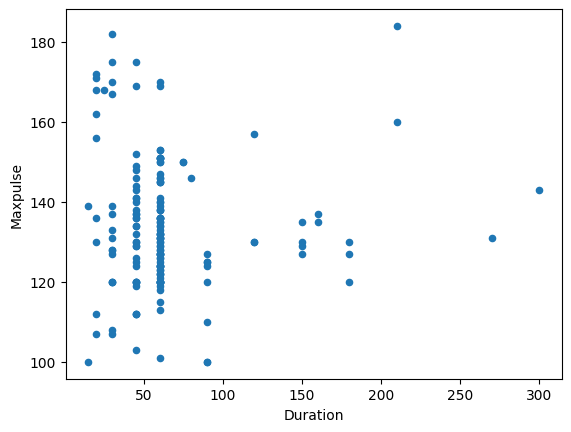

In [28]:
# A scatterplot where there are no relationship between the columns:
df.plot(kind = "scatter", x = 'Duration', y = "Maxpulse")
plt.show()

### Histogram

Use the `kind` argument to specify that you want a histogram:<br>
`kind = 'hist'`
A histogram needs only one column.<br>
A histogram shows us the frequecy of each interval, e.g. how many workouts lasted between 50 and 60 minutes?<br>
In the example below we will use the "Duration" column to create the histogram:

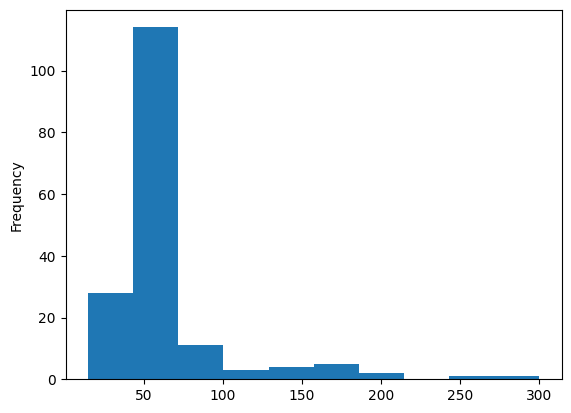

In [30]:
df["Duration"].plot(kind = "hist")
plt.show()